# HW #0: Exploring the Iris Dataset

**Name:** Fakharyar Khan  
**Class:** Applied Machine Learning  


In [89]:
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

## Loading in the Iris Dataset
In this step, the feature matrix from the Iris dataset is loaded into a NumPy array, while the class labels are extracted and stored in a list.

In [42]:
feat_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
class_names = [""]
iris_feat = np.zeros((150, 4))
iris_labels = []

with open(os.path.join("iris_data", "iris.data")) as f:
    for index, line in enumerate(f):
        row = line.strip().split(",")
        features = [float(feat) for feat in row[:-1]]
        label = row[-1]
        iris_feat[index] = features
        iris_labels.append(label)


print("The features of the Iris dataset are: \n")
for index, feat in enumerate(feat_names):
    print("\t", str(index + 1) + ". ", feat)

print("\nDimensions of feature matrix for Iris dataset: ", len(iris_feat), " x ", len(iris_feat[0]))

The features of the Iris dataset are: 

	 1.  Sepal Length
	 2.  Sepal Width
	 3.  Petal Length
	 4.  Petal Width

Dimensions of feature matrix for Iris dataset:  150  x  4


## Generating Pairwise Feature Scatter Plots
In this section, we generate scatter plots to compare each pair of features. A 4x4 grid of scatter plots is created to visualize the relationship between all combinations of the four features in the Iris dataset for each category in our dataset.


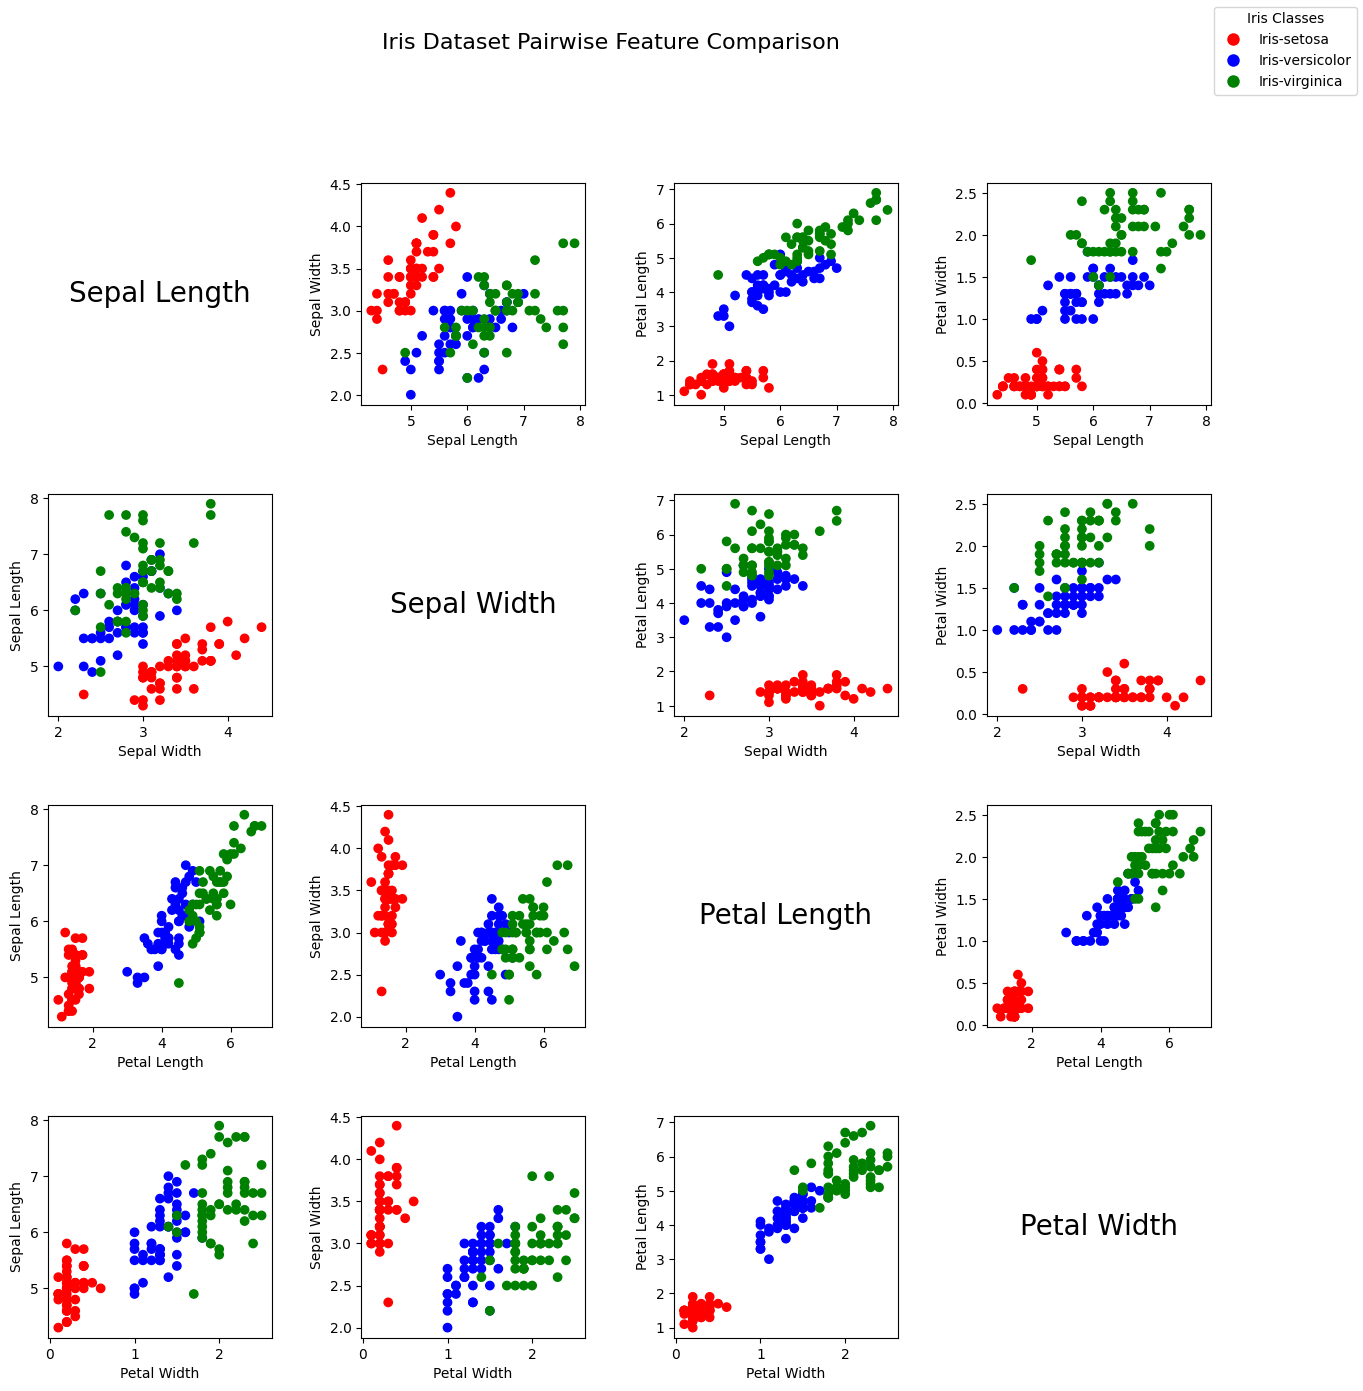

In [43]:
colors = ["r", "b", "g"]
color_map = dict(zip(list(set(iris_labels)), colors))
color_labels = list(map(lambda label: color_map[label], iris_labels))

fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i in range(len(feat_names)):
    for j in range(len(feat_names)):
        if i == j:
            axes[i, j].text(0.5, 0.5, feat_names[i],
                             fontsize=20, ha='center',
                               va='center', transform=axes[i, j].transAxes)
            axes[i, j].axis('off')

        else:
            axes[i, j].scatter(iris_feat[:, i], iris_feat[:, j], c=color_labels)
            axes[i, j].set_xlabel(feat_names[i])
            axes[i, j].set_ylabel(feat_names[j])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

fig.suptitle("Iris Dataset Pairwise Feature Comparison", fontsize=16)

labels = list(color_map.keys())
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10) for label in labels]
fig.legend(handles, labels, loc='upper right', title='Iris Classes')

plt.show()


## Simple Iris Dataset Classifier

In this section, a very simple rule-based classifier is implemented to predict the species of Iris based on the last feature (petal width):

- **Function `predict(x)`**: 
  - If the petal width (`x[-1]`) is less than 0.9, it predicts "Iris-setosa".
  - If the petal width is between 0.9 and 1.7, it predicts "Iris-versicolor".
  - Otherwise, it predicts "Iris-virginica".

- **Predictions**: 
  The classifier is applied to each sample in the dataset, and predictions are stored in a list.

- **Accuracy Calculation**: 
  The number of correct predictions is counted by comparing the predicted labels to the true class labels (`iris_labels`). The accuracy is then calculated as the ratio of correct predictions to the total number of samples, and the result is printed as a percentage.


In [90]:
def predict(x):
    if x[-1] < .9:
        return "Iris-setosa"
    elif x[-1] < 1.7:
        return "Iris-versicolor"
    else:
        return "Iris-virginica"

predictions = []
for sample in iris_feat:
    predictions.append(predict(sample))

num_correct = sum([1 if predictions[i] == iris_labels[i] else 0 for i in range(len(iris_labels))])

accuracy = num_correct/len(iris_labels)

display(HTML(f"<span style='color: green;'>This classifier's accuracy is {accuracy*100}%!</span>"))